# Initial Pipeline Setup

In [1]:
# import libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import seaborn as sns
sys.tracebacklimit = 0 # turn off the error tracebacks
pd.options.mode.chained_assignment = None  # no warnings for chained assignments
from ftfy.badness import sequence_weirdness
from selectolax.parser import HTMLParser
import codecs

In [2]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /home/jrm4ag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jrm4ag/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/jrm4ag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /home/jrm4ag/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [3]:
def get_text_all(soup):
    #class AppURLopener(urllib.request.FancyURLopener):
    #    version = "Mozilla/5.0"
    #opener = AppURLopener()
    #response = opener.open(url)

    for script in soup(["script", "style"]):
        script.decompose()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    
    #drop additional newlines, tabs, and delimiters
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("|", " ")

    return text

In [4]:
import os
cwd = os.getcwd()
cwd

'/sfs/lustre/bahamut/scratch/ml8vp/internet_archive_html'

## Getting the GWB Data

In [5]:
#can take a while to run
data_dir = r"/sfs/lustre/bahamut/scratch/ml8vp/internet_archive_html"
html_folder = r'/data/gwb_html'
all_html = glob.glob(f'{data_dir+html_folder}/**/*.html', recursive=True)
len(all_html)

9952

In [6]:
all_html[0]

'/sfs/lustre/bahamut/scratch/ml8vp/internet_archive_html/data/gwb_html/BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO.html'

In [7]:
df_featuresGWB = pd.DataFrame(all_html, columns = ["html_file"])
df_featuresGWB

,html_file
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
...,...
9947,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9948,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9949,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9950,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...


In [8]:
df_featuresGWB["source"] = "GWB"
df_featuresGWB["research"] = 0
df_featuresGWB["filename"] = df_featuresGWB["html_file"].str.split('/').str[9].str.split('.').str[0]
df_featuresGWB

,html_file,source,research,filename
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT
...,...,...,...,...
9947,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,TGQ5X2J42UDPUGQTND7O2A4YIRM6IQDS
9948,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,RSC6B64DPBUK2YLJY3OAW7GA3V5DAZPY
9949,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,WAZBPNBE2UCBYUN5PXRWMFF5PYRSR4WO
9950,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,XRJ2MLNRKVT7PXFSGRM2ZEUYIFZCSBSK


In [9]:
# read url map
df_url_map = pd.read_csv(data_dir + '/data/gwb_url_map.csv')
df_url_map

,filename,url
0,YW3QUVVG34IHHSDTIYPYJA7WOZGA67MY,https://katelascensori.it/2019/03/05/servoscal...
1,R3V2AWSBHHGRM72JRKQYI2WRQO6KQRGX,http://specialcom.net/gadzhety/phone/chto-tako...
2,FNSGFLWTMG2R277JRQP6BZIE2BZ4C63T,https://www.yourlisten.com/metal/lifes-verge
3,PRNMCVPZXPZROOCM6VKXGFOTGMXI54VR,http://www.shopfords3.net/mn/altura.html
4,JUAHCMXWCROIQNERQ6TYHFZEBXDI2MI5,http://www.carpointz.com/products/FOCAL/130CA1...
...,...,...
9994,G7X35MGWBHH3JDNVMTDBTTGPV7P4S6ZY,https://www.ksiazkikmk.pl/dec-2405/price-for-p...
9995,P4TKPQPA224LPTDRFBXU5MD4VCF5RALF,http://www.solide.com/fr/blanco.asp
9996,RJND2OHYWLLXXYTQU3X2JPEGJ2VKH7YQ,http://www.actuel-immo.com/448-t2-avec-terrass...
9997,SQKSYPNI4LHOK7WEMTEPVUHXHVS4SAWL,http://thecobrasnake.com/partyphotos/stickyric...


In [10]:
df_featuresGWB = pd.merge(df_featuresGWB, df_url_map, on='filename')

## Getting the FatCat Data

In [11]:
#can take a while to run
data_dir = r"/sfs/lustre/bahamut/scratch/ml8vp/internet_archive_html"
html_folder = r'/data/fatcat_html'
all_html = glob.glob(f'{data_dir+html_folder}/**/*.html', recursive=True)
len(all_html)

9944

In [12]:
all_html[0]

'/sfs/lustre/bahamut/scratch/ml8vp/internet_archive_html/data/fatcat_html/a05c1096616285c647cbde5fbdb0289298002008.html'

In [13]:
df_featuresFATCAT = pd.DataFrame(all_html, columns = ["html_file"])
df_featuresFATCAT

,html_file
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
...,...
9939,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9940,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...


In [14]:
df_featuresFATCAT["source"] = "FATCAT"
df_featuresFATCAT["research"] = 1
df_featuresFATCAT["filename"] = df_featuresFATCAT["html_file"].str.split('/').str[9].str.split('.').str[0]
df_featuresFATCAT

,html_file,source,research,filename
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,a05c1096616285c647cbde5fbdb0289298002008
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,242c3c18f83e50889f1962c5df64851fb07a31d0
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,d10de4cded3fafb6e5310f10663324e0df67388a
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,743293369a0d9bcdcb1819f186d10c5eb7649866
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,02bccf2e50e1a18af65fee27080b23819b756d2b
...,...,...,...,...
9939,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b
9940,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8


In [15]:
# read url map
df_url_map = pd.read_csv(data_dir + '/data/fatcat_url_map.csv')
df_url_map

,filename,url
0,939a422a1bd6577a5517800a1ad59f0387440229,https://link.springer.com/article/10.1007/s132...
1,a7131015201081edda53d7df8c0f5779f64280b3,https://www.mdpi.com/2076-3417/10/18/6469/htm
2,6169ec0a45613b559caa85c3ed79f727430d36b2,https://www.frontiersin.org/articles/10.3389/f...
3,b1298ff49a849def2eeb4aeffcefc01d8c7bf705,https://www.termedia.pl/Sex-related-difference...
4,00452a8c365060a17c030d2402b30343dcdc4d40,https://theologiaviatorum.org/index.php/tv/art...
...,...,...
9994,7af8393107b4cd7734663953a262a32f405c31c5,https://www.frontiersin.org/articles/10.3389/f...
9995,d70d75d4b1b0e0e06bbe605c77d1a9186cefb4ac,https://www.frontiersin.org/articles/10.3389/f...
9996,456e7776874b54308bf3f8638d0d7c438f036b1d,https://www.qualitative-research.net/index.php...
9997,8af429fd1064e6be16e9d6bcabbf08b49854e55a,https://www.mdpi.com/2073-4433/11/10/1112/htm


In [16]:
df_featuresFATCAT = pd.merge(df_featuresFATCAT, df_url_map, on='filename')

# Join the two datasets together

In [17]:
# Join first monday data with recipe data
df_featuresFinal = pd.concat([df_featuresGWB, df_featuresFATCAT])

In [18]:
df_featuresFinal

,html_file,source,research,filename,url
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/
...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm


In [19]:
df_featuresFinal.iloc[1900,1]

'GWB'

## Some additional processing of fatcat

In [20]:
# file_example = df_featuresFinal.iloc[18500,1]
# soup = BeautifulSoup(open(file_example, encoding = "ISO-8859-1"), "html.parser")
# txt = get_text_all(soup)

In [21]:
# txt

# Multiprocessing

In [22]:
from multiprocessing import Pool
from multiprocessing import cpu_count

__Selecting the proper encoding has an impact on how the parser interprets special characters, which has a greater impact on foreign languages.__    
_"The drawback to this encoding scheme is its inability to accommodate languages comprised of more than 128 symbols, or to safely display more than one family of symbols at one time. As well, ISO-8859 encodings have fallen out of favor with the rise of UTF. The ISO "Working Group" in charge of it having disbanded in 2004, leaving maintenance up to its parent subcommittee."_    
https://stackoverflow.com/questions/7048745/what-is-the-difference-between-utf-8-and-iso-8859-1__

__Unicode__ is a list of characters with unique decimal numbers (code points). A = 65, B = 66, C = 67, ....
This list of decimal numbers represent the string "hello": 104 101 108 108 111

__Encoding__ is how these numbers are translated into binary numbers to be stored in a computer:
UTF-8 encoding will store "hello" like this (binary): 01101000 01100101 01101100 01101100  01101111    

Until 10-15 years it was not strange to have languages have their own encoding (i.e. Japan and Russia). This article talks about this and what is included. 
https://www.asc.ohio-state.edu/demarneffe.1/LING5050/material/characters.html    

Mojibake (文字化け; IPA: [mod͡ʑibake]) is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system.   
The differences between between ASCII, ISO 8859, and Unicode: https://kb.iu.edu/d/ahfr

In [23]:
def htmlParsing(x): 
    """ This function takes the input text and cleans the HTML tags from it
    """
    try:
        soup = BeautifulSoup(open(x, "rb"), "html5lib")
        
    except:
        soup = BeautifulSoup(open(x, encoding = "ISO-8859-1"), "html5lib")
        
    txt = get_text_all(soup)
    
    return txt

In [25]:
print(df_featuresFinal[['html_file']])

                                              html_file
0     /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
1     /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
2     /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
3     /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
4     /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
...                                                 ...
9941  /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9942  /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9943  /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9944  /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...
9945  /sfs/lustre/bahamut/scratch/ml8vp/internet_arc...

[19899 rows x 1 columns]


In [27]:
def addTextColumn(row):
    return htmlParsing(row.html_file)

In [28]:
# apply to data frame
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

# 
def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool = Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))

In [32]:
%%time
# get text from html files
nodes = cpu_count()
df_featuresFinal['Text'] = apply_by_multiprocessing(df_featuresFinal, addTextColumn, axis=1, workers=nodes)
# df_test['Text'] = apply_by_multiprocessing(df_test, addTextColumn, axis=1, workers=nodes) #df_featuresGWB

CPU times: user 823 ms, sys: 702 ms, total: 1.52 s
Wall time: 3min 5s


In [36]:
df_featuresFinal[df_featuresFinal['Text'].isna()]

,html_file,source,research,filename,url,Text


There are 72 GWB entries that are blank
Upon consideration though, there could be randomly crawled HTML files that contain no test, so keeping it is relevant.
However, we will be  unable to detect langugages so they will have to be removed when using lang detect

In [37]:
#how many don't have content?
len(df_featuresFinal[df_featuresFinal["Text"]==""])

72

In [38]:
# drop columns with empty text
# df_featuresFinal = df_featuresFinal.dropna(subset=['Text'])
df_featuresFinal = df_featuresFinal[df_featuresFinal['Text'].notna()]
df_featuresFinal = df_featuresFinal[df_featuresFinal['Text']!=""]

We have a balanced dataset

In [39]:
df_featuresFinal[['source', 'Text']].groupby(['source']).agg(['count'])

,Text
,count
source,
FATCAT,9946
GWB,9881


# Language Detection 

In [45]:
from langdetect import detect

In [46]:
detect("This is a test to see if its working")

'en'

In [47]:
def addLang(row):
    try:
        lang_detected = detect(row.Text)
        return lang_detected
    except:
        return np.nan

In [48]:
%%time
df_featuresFinal['lang_langdetect_multi'] = apply_by_multiprocessing(df_featuresFinal, addLang, axis=1, workers=nodes)

CPU times: user 865 ms, sys: 990 ms, total: 1.86 s
Wall time: 26.2 s


In [49]:
len(df_featuresFinal[df_featuresFinal['lang_langdetect_multi'].isna()])

3

In [50]:
df_featuresFinal_nan = df_featuresFinal[df_featuresFinal['lang_langdetect_multi'].isna()]

# tester_nan[['source']].groupby(['source']).agg(['count'])

print("The amount of GWB translated as NAN is " + str(len(df_featuresFinal_nan[df_featuresFinal_nan['source'] == "GWB"].isna())))
print("The amount of FATCAT translated as NAN is " + str(len(df_featuresFinal_nan[df_featuresFinal_nan['source'] == "FATCAT"].isna())))

The amount of GWB translated as NAN is 3
The amount of FATCAT translated as NAN is 0


In [51]:
df_featuresFinal = df_featuresFinal[df_featuresFinal['lang_langdetect_multi'].notna()]

In [52]:
# df_featuresFinal.to_csv("TextandLangData_Apr6.csv")

In [53]:
df_lang_counts = df_featuresFinal['lang_langdetect_multi']
df_lang_counts = df_lang_counts.value_counts().rename_axis('language').to_frame('counts')
df_lang_counts = df_lang_counts.reset_index()
df_lang_counts.head()

,language,counts
0,en,13303
1,es,1266
2,ru,776
3,zh-cn,642
4,de,596


In [54]:
df_lang_counts_total = df_featuresFinal['lang_langdetect_multi']
df_lang_counts_total = df_lang_counts_total.value_counts().rename_axis('language').to_frame('counts')
df_lang_counts_total = df_lang_counts_total.reset_index()
df_lang_counts_total.head()

,language,counts
0,en,13303
1,es,1266
2,ru,776
3,zh-cn,642
4,de,596


In [55]:
df_lang_counts_FATCAT = df_featuresFinal[df_featuresFinal["source"]=="FATCAT"]['lang_langdetect_multi']
df_lang_counts_FATCAT = df_lang_counts_FATCAT.value_counts().rename_axis('language').to_frame('counts')
df_lang_counts_FATCAT = df_lang_counts_FATCAT.reset_index()
df_lang_counts_FATCAT.head()

,language,counts
0,en,8010
1,es,912
2,ru,250
3,pt,196
4,de,149


In [56]:
df_lang_counts_GWB = df_featuresFinal[df_featuresFinal["source"]=="GWB"]['lang_langdetect_multi']
df_lang_counts_GWB = df_lang_counts_GWB.value_counts().rename_axis('language').to_frame('counts')
df_lang_counts_GWB = df_lang_counts_GWB.reset_index()
df_lang_counts_GWB.head()

,language,counts
0,en,5293
1,zh-cn,624
2,ja,532
3,ru,526
4,de,447


In [57]:
iso_639_choices = [('ab', 'Abkhaz'),
('aa', 'Afar'),
('af', 'Afrikaans'),
('ak', 'Akan'),
('sq', 'Albanian'),
('am', 'Amharic'),
('ar', 'Arabic'),
('an', 'Aragonese'),
('hy', 'Armenian'),
('as', 'Assamese'),
('av', 'Avaric'),
('ae', 'Avestan'),
('ay', 'Aymara'),
('az', 'Azerbaijani'),
('bm', 'Bambara'),
('ba', 'Bashkir'),
('eu', 'Basque'),
('be', 'Belarusian'),
('bn', 'Bengali'),
('bh', 'Bihari'),
('bi', 'Bislama'),
('bs', 'Bosnian'),
('br', 'Breton'),
('bg', 'Bulgarian'),
('my', 'Burmese'),
('ca', 'Catalan; Valencian'),
('ch', 'Chamorro'),
('ce', 'Chechen'),
('ny', 'Chichewa; Chewa; Nyanja'),
('zh', 'Chinese'),
('zh-cn', 'Chinese'),
('cv', 'Chuvash'),
('kw', 'Cornish'),
('co', 'Corsican'),
('cr', 'Cree'),
('hr', 'Croatian'),
('cs', 'Czech'),
('da', 'Danish'),
('dv', 'Divehi; Maldivian;'),
('nl', 'Dutch'),
('dz', 'Dzongkha'),
('en', 'English'),
('eo', 'Esperanto'),
('et', 'Estonian'),
('ee', 'Ewe'),
('fo', 'Faroese'),
('fj', 'Fijian'),
('fi', 'Finnish'),
('fr', 'French'),
('ff', 'Fula'),
('gl', 'Galician'),
('ka', 'Georgian'),
('de', 'German'),
('el', 'Greek, Modern'),
('gn', 'Guaraní'),
('gu', 'Gujarati'),
('ht', 'Haitian'),
('ha', 'Hausa'),
('he', 'Hebrew (modern)'),
('hz', 'Herero'),
('hi', 'Hindi'),
('ho', 'Hiri Motu'),
('hu', 'Hungarian'),
('ia', 'Interlingua'),
('id', 'Indonesian'),
('ie', 'Interlingue'),
('ga', 'Irish'),
('ig', 'Igbo'),
('ik', 'Inupiaq'),
('io', 'Ido'),
('is', 'Icelandic'),
('it', 'Italian'),
('iu', 'Inuktitut'),
('ja', 'Japanese'),
('jv', 'Javanese'),
('kl', 'Kalaallisut'),
('kn', 'Kannada'),
('kr', 'Kanuri'),
('ks', 'Kashmiri'),
('kk', 'Kazakh'),
('km', 'Khmer'),
('ki', 'Kikuyu, Gikuyu'),
('rw', 'Kinyarwanda'),
('ky', 'Kirghiz, Kyrgyz'),
('kv', 'Komi'),
('kg', 'Kongo'),
('ko', 'Korean'),
('ku', 'Kurdish'),
('kj', 'Kwanyama, Kuanyama'),
('la', 'Latin'),
('lb', 'Luxembourgish'),
('lg', 'Luganda'),
('li', 'Limburgish'),
('ln', 'Lingala'),
('lo', 'Lao'),
('lt', 'Lithuanian'),
('lu', 'Luba-Katanga'),
('lv', 'Latvian'),
('gv', 'Manx'),
('mk', 'Macedonian'),
('mg', 'Malagasy'),
('ms', 'Malay'),
('ml', 'Malayalam'),
('mt', 'Maltese'),
('mi', 'Māori'),
('mr', 'Marathi (Marāṭhī)'),
('mh', 'Marshallese'),
('mn', 'Mongolian'),
('na', 'Nauru'),
('nv', 'Navajo, Navaho'),
('nb', 'Norwegian Bokmål'),
('nd', 'North Ndebele'),
('ne', 'Nepali'),
('ng', 'Ndonga'),
('nn', 'Norwegian Nynorsk'),
('no', 'Norwegian'),
('ii', 'Nuosu'),
('nr', 'South Ndebele'),
('oc', 'Occitan'),
('oj', 'Ojibwe, Ojibwa'),
('cu', 'Old Church Slavonic'),
('om', 'Oromo'),
('or', 'Oriya'),
('os', 'Ossetian, Ossetic'),
('pa', 'Panjabi, Punjabi'),
('pi', 'Pāli'),
('fa', 'Persian'),
('pl', 'Polish'),
('ps', 'Pashto, Pushto'),
('pt', 'Portuguese'),
('qu', 'Quechua'),
('rm', 'Romansh'),
('rn', 'Kirundi'),
('ro', 'Romanian, Moldavan'),
('ru', 'Russian'),
('sa', 'Sanskrit (Saṁskṛta)'),
('sc', 'Sardinian'),
('sd', 'Sindhi'),
('se', 'Northern Sami'),
('sm', 'Samoan'),
('sg', 'Sango'),
('sr', 'Serbian'),
('gd', 'Scottish Gaelic'),
('sn', 'Shona'),
('si', 'Sinhala, Sinhalese'),
('sk', 'Slovak'),
('sl', 'Slovene'),
('so', 'Somali'),
('st', 'Southern Sotho'),
('es', 'Spanish; Castilian'),
('su', 'Sundanese'),
('sw', 'Swahili'),
('ss', 'Swati'),
('sv', 'Swedish'),
('ta', 'Tamil'),
('te', 'Telugu'),
('tg', 'Tajik'),
('th', 'Thai'),
('ti', 'Tigrinya'),
('bo', 'Tibetan'),
('tk', 'Turkmen'),
('tl', 'Tagalog'),
('tn', 'Tswana'),
('to', 'Tonga'),
('tr', 'Turkish'),
('ts', 'Tsonga'),
('tt', 'Tatar'),
('tw', 'Twi'),
('ty', 'Tahitian'),
('ug', 'Uighur, Uyghur'),
('uk', 'Ukrainian'),
('ur', 'Urdu'),
('uz', 'Uzbek'),
('ve', 'Venda'),
('vi', 'Vietnamese'),
('vo', 'Volapük'),
('wa', 'Walloon'),
('cy', 'Welsh'),
('wo', 'Wolof'),
('fy', 'Western Frisian'),
('xh', 'Xhosa'),
('yi', 'Yiddish'),
('yo', 'Yoruba'),
('za', 'Zhuang, Chuang'),
('zu', 'Zulu'),]

In [58]:
df_lang_codes = pd.DataFrame(iso_639_choices, columns = ['language', 'Language'])
df_lang_codes.head()

,language,Language
0,ab,Abkhaz
1,aa,Afar
2,af,Afrikaans
3,ak,Akan
4,sq,Albanian


In [59]:
df_lang_counts_total = pd.merge(df_lang_counts_total, df_lang_codes, how = "left", on = 'language')
df_lang_counts_fatcat = pd.merge(df_lang_counts_FATCAT, df_lang_codes, how = "left", on = 'language')
df_lang_counts_gwb = pd.merge(df_lang_counts_GWB, df_lang_codes, how = "left", on = 'language')

In [60]:
df_lang_counts_total.head()

,language,counts,Language
0,en,13303,English
1,es,1266,Spanish; Castilian
2,ru,776,Russian
3,zh-cn,642,Chinese
4,de,596,German


In [61]:
total_total = sum(df_lang_counts_total['counts'])
total_FATCAT = sum(df_lang_counts_fatcat['counts'])
total_GWB = sum(df_lang_counts_gwb['counts'])

In [62]:
df_lang_counts_total['percentage'] = round(df_lang_counts_total['counts']/total_total*100,2)
df_lang_counts_fatcat['percentage'] = round(df_lang_counts_fatcat['counts']/total_FATCAT*100,2)
df_lang_counts_gwb['percentage'] = round(df_lang_counts_gwb['counts']/total_GWB*100,2)

In [63]:
df_lang_counts_total.head()

,language,counts,Language,percentage
0,en,13303,English,67.11
1,es,1266,Spanish; Castilian,6.39
2,ru,776,Russian,3.91
3,zh-cn,642,Chinese,3.24
4,de,596,German,3.01


In [64]:
df_lang_counts_total['Language'] = df_lang_counts_total['Language'].astype(str)
df_lang_counts_fatcat['Language'] = df_lang_counts_fatcat['Language'].astype(str)
df_lang_counts_gwb['Language'] = df_lang_counts_gwb['Language'].astype(str)

In [65]:
cutoff = 0.1

In [66]:
other_count_total = sum(df_lang_counts_total[df_lang_counts_total['percentage'] < cutoff]['counts'])
other_count_fatcat = sum(df_lang_counts_fatcat[df_lang_counts_fatcat['percentage'] < cutoff]['counts'])
other_count_gwb = sum(df_lang_counts_gwb[df_lang_counts_gwb['percentage'] < cutoff]['counts'])

In [67]:
['other',other_count_total, "Other", other_count_total/total_total]

['other', 71, 'Other', 0.0035815173527037935]

In [68]:
df_other_total = pd.DataFrame([['other',other_count_total, "Other", round(other_count_total/total_total*100,2)]], columns = ["language","counts","Language","percentage"])
df_other_fatcat = pd.DataFrame([['other',other_count_fatcat, "Other", round(other_count_fatcat/total_FATCAT*100,2)]], columns = ["language","counts","Language","percentage"])
df_other_gwb = pd.DataFrame([['other',other_count_gwb, "Other", round(other_count_gwb/total_GWB*100,2)]], columns = ["language","counts","Language","percentage"])
df_other_total

,language,counts,Language,percentage
0,other,71,Other,0.36


In [69]:
df_lang_counts_withOther_total = df_lang_counts_total[df_lang_counts_total['percentage'] >= cutoff]
df_lang_counts_withOther_total = df_lang_counts_withOther_total.append(df_other_total)
df_lang_counts_withOther_total

,language,counts,Language,percentage
0,en,13303,English,67.11
1,es,1266,Spanish; Castilian,6.39
2,ru,776,Russian,3.91
3,zh-cn,642,Chinese,3.24
4,de,596,German,3.01
5,ja,532,Japanese,2.68
6,fr,467,French,2.36
7,pt,361,Portuguese,1.82
8,it,274,Italian,1.38
9,pl,164,Polish,0.83


In [70]:
df_lang_counts_withOther_fatcat = df_lang_counts_fatcat[df_lang_counts_fatcat['percentage'] >= cutoff]
df_lang_counts_withOther_fatcat = df_lang_counts_withOther_fatcat.append(df_other_fatcat)
df_lang_counts_withOther_fatcat

,language,counts,Language,percentage
0,en,8010,English,80.53
1,es,912,Spanish; Castilian,9.17
2,ru,250,Russian,2.51
3,pt,196,Portuguese,1.97
4,de,149,German,1.50
5,no,116,Norwegian,1.17
6,it,86,Italian,0.86
7,fr,34,French,0.34
8,pl,26,Polish,0.26
9,et,23,Estonian,0.23


In [71]:
df_lang_counts_withOther_gwb = df_lang_counts_gwb[df_lang_counts_gwb['percentage'] >= cutoff]
df_lang_counts_withOther_gwb = df_lang_counts_withOther_gwb.append(df_other_gwb)
df_lang_counts_withOther_gwb

,language,counts,Language,percentage
0,en,5293,English,53.58
1,zh-cn,624,Chinese,6.32
2,ja,532,Japanese,5.39
3,ru,526,Russian,5.32
4,de,447,German,4.53
5,fr,433,French,4.38
6,es,354,Spanish; Castilian,3.58
7,it,188,Italian,1.90
8,pt,165,Portuguese,1.67
9,ko,160,Korean,1.62


In [72]:
# df_featuresFinal[df_featuresFinal["lang_langdetect_multi"]=="zh-cn"]

In [73]:
from matplotlib import pyplot as plt

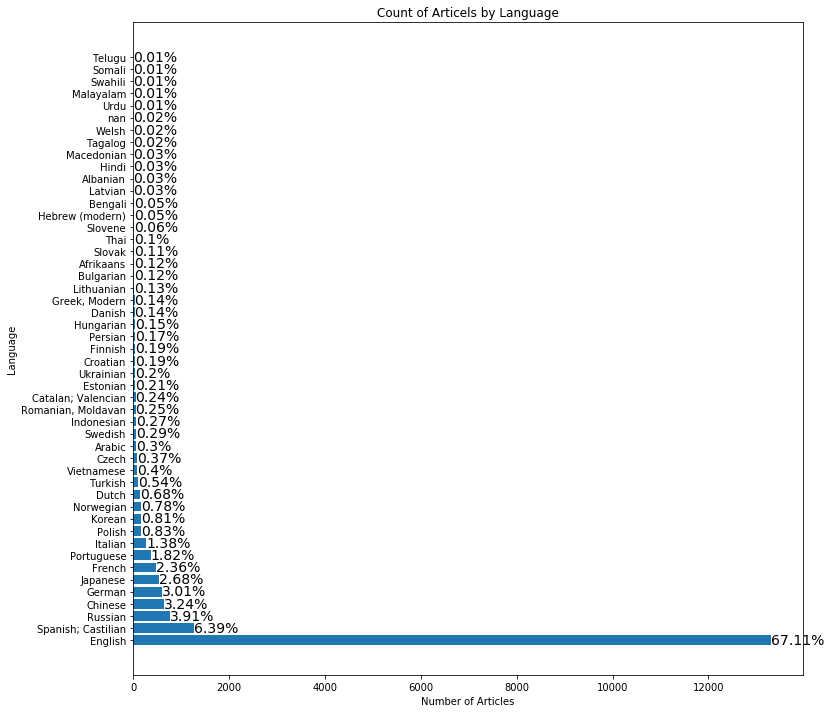

In [74]:
plt.figure(figsize=(12, 12))
myplot = plt.barh(df_lang_counts_total['Language'], df_lang_counts_total['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title('Count of Articels by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_total['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14, color='black')

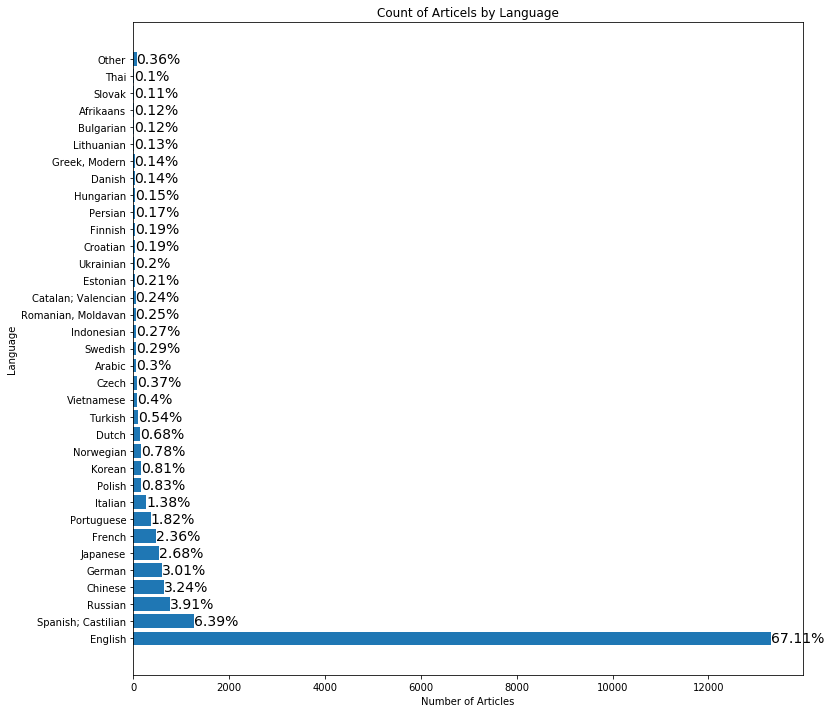

In [75]:
plt.figure(figsize=(12, 12))
myplot = plt.barh(df_lang_counts_withOther_total['Language'], df_lang_counts_withOther_total['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title('Count of Articels by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_withOther_total['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14, color='black')

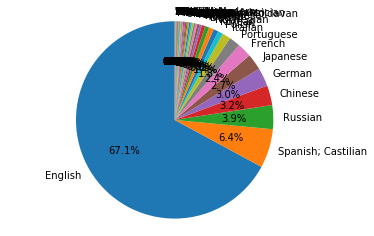

In [76]:
fig1, ax1 = plt.subplots()
ax1.pie(df_lang_counts_total['counts'], labels=df_lang_counts_total['Language'], autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Figure size 720x720 with 0 Axes>

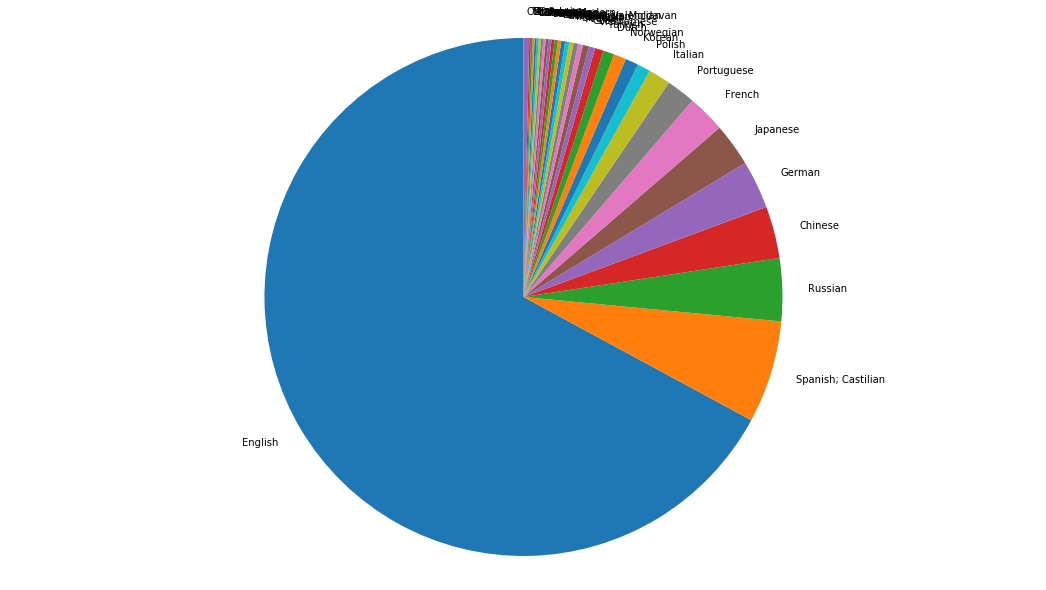

In [77]:
plt.figure(figsize=(10, 10))
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(df_lang_counts_withOther_total['counts'], labels=df_lang_counts_withOther_total['Language'], #autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

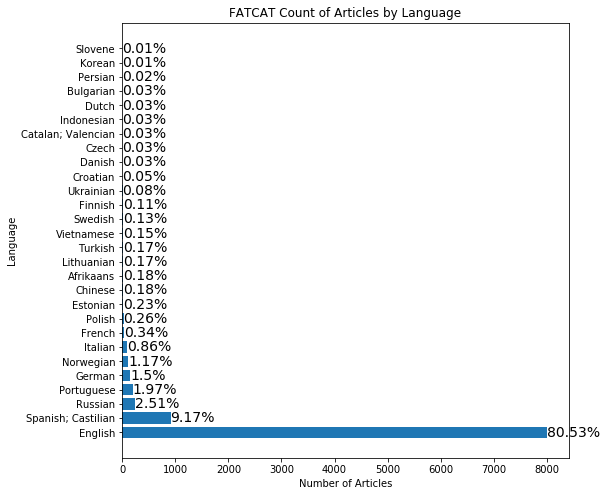

In [78]:
plt.figure(figsize=(8, 8))
myplot = plt.barh(df_lang_counts_fatcat['Language'], df_lang_counts_fatcat['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title('FATCAT Count of Articles by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_fatcat['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14, color='black')

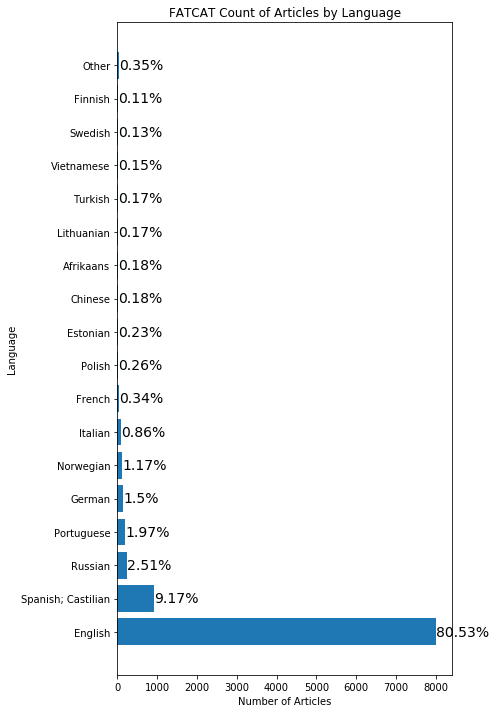

In [79]:
plt.figure(figsize=(6, 12))
myplot = plt.barh(df_lang_counts_withOther_fatcat['Language'], df_lang_counts_withOther_fatcat['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title('FATCAT Count of Articles by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_withOther_fatcat['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14, color='black')

<Figure size 720x720 with 0 Axes>

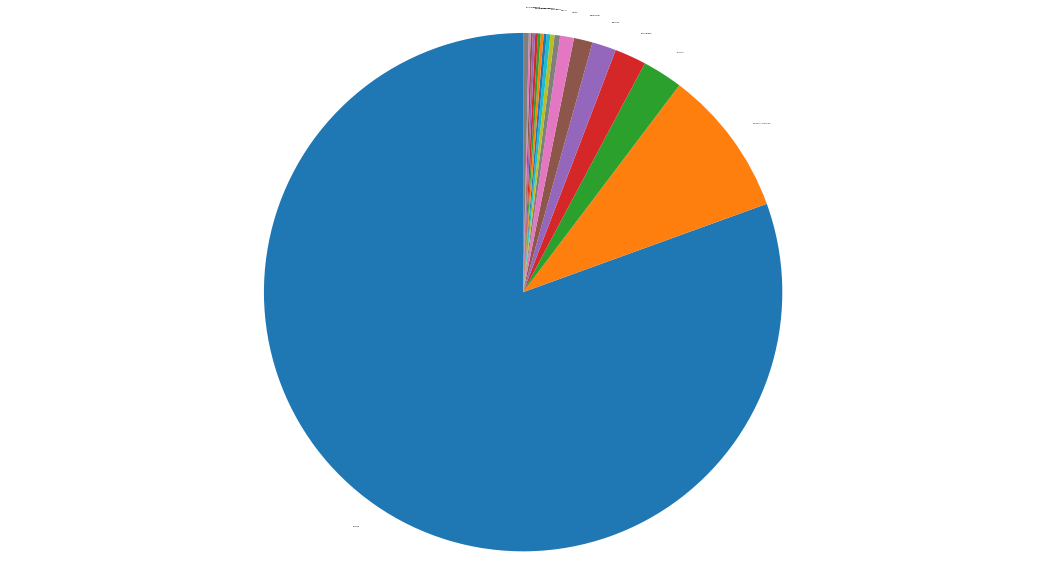

In [96]:
plt.figure(figsize=(10, 10))
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(df_lang_counts_withOther_fatcat['counts'], labels=df_lang_counts_withOther_fatcat['Language'], #autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

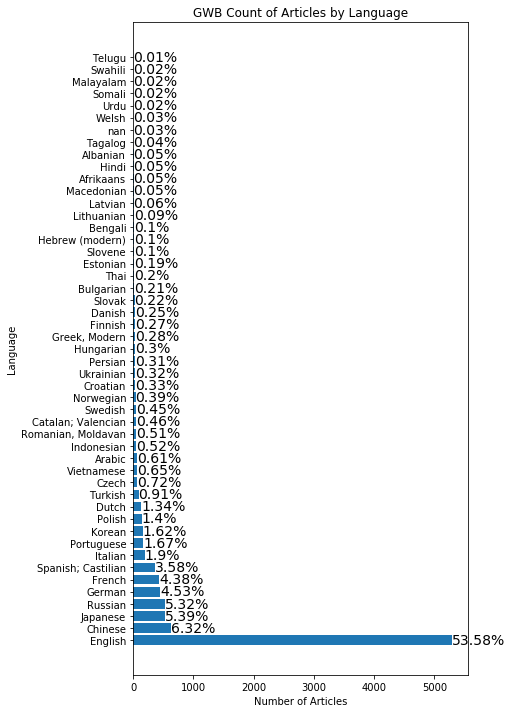

In [81]:
plt.figure(figsize=(6, 12))
myplot = plt.barh(df_lang_counts_gwb['Language'], df_lang_counts_gwb['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title('GWB Count of Articles by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_gwb['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14, color='black')

In [102]:
plt.rcParams.update({'font.size': 18})

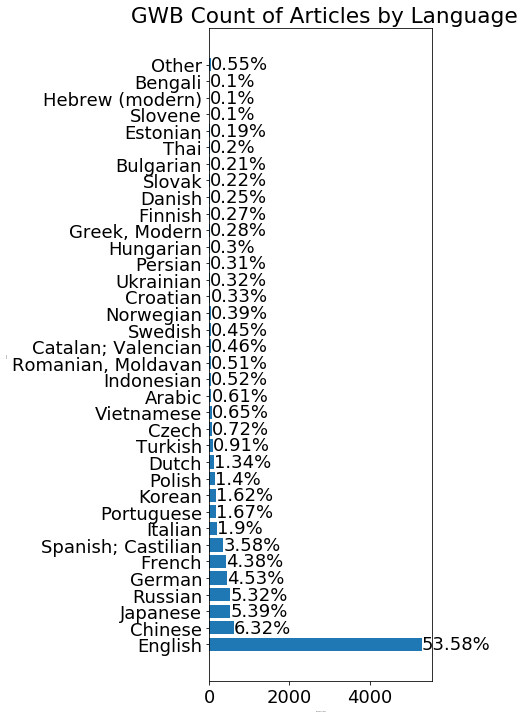

In [104]:
plt.figure(figsize=(4, 12))
myplot = plt.barh(df_lang_counts_withOther_gwb['Language'], df_lang_counts_withOther_gwb['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title(' GWB Count of Articles by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_withOther_gwb['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=18, color='black')

<Figure size 720x720 with 0 Axes>

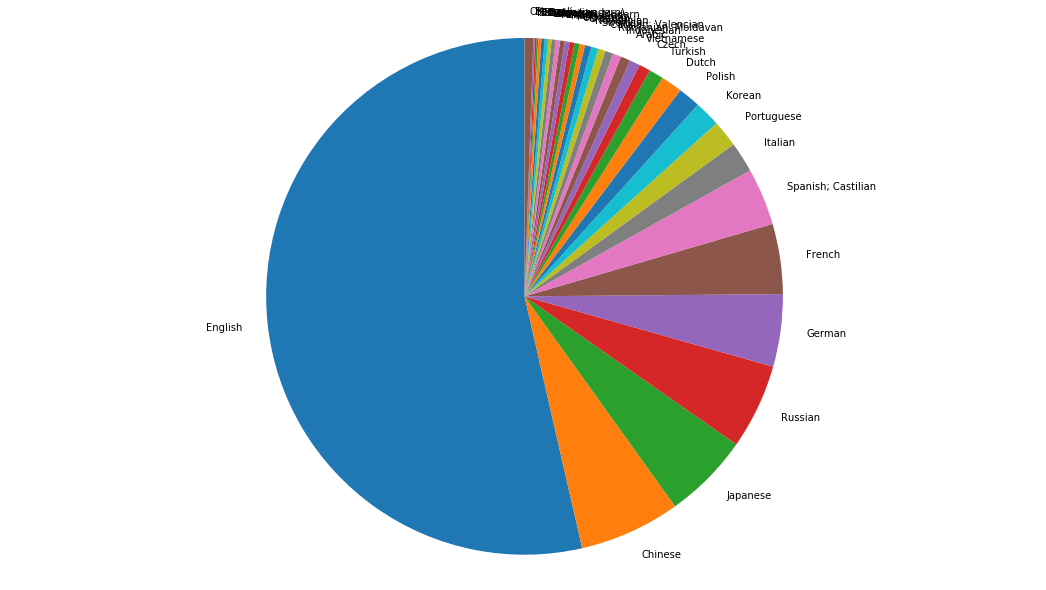

In [83]:
plt.figure(figsize=(10, 10))
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(df_lang_counts_withOther_gwb['counts'], labels=df_lang_counts_withOther_gwb['Language'], #autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [84]:
len(df_featuresFinal)

19824

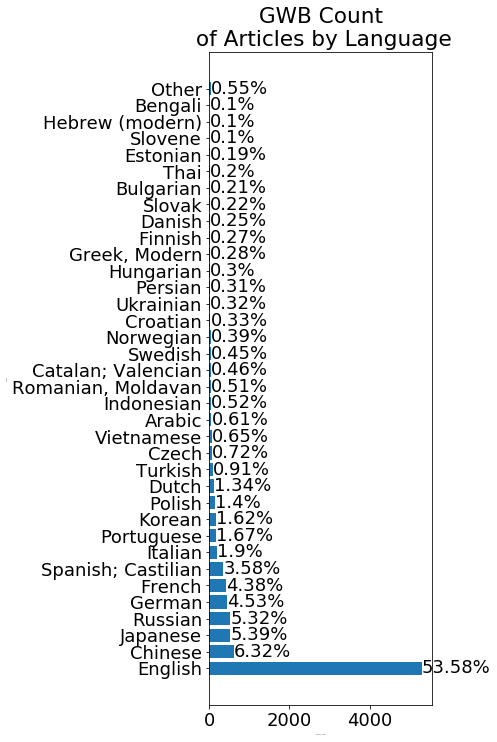

In [113]:
plt.figure(figsize=(4, 12))

# plt.subplot(1, 2, 1)

# plt.figure(figsize=(6, 12))
myplot = plt.barh(df_lang_counts_withOther_gwb['Language'], df_lang_counts_withOther_gwb['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title(' GWB Count \n of Articles by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_withOther_gwb['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=18, color='black')

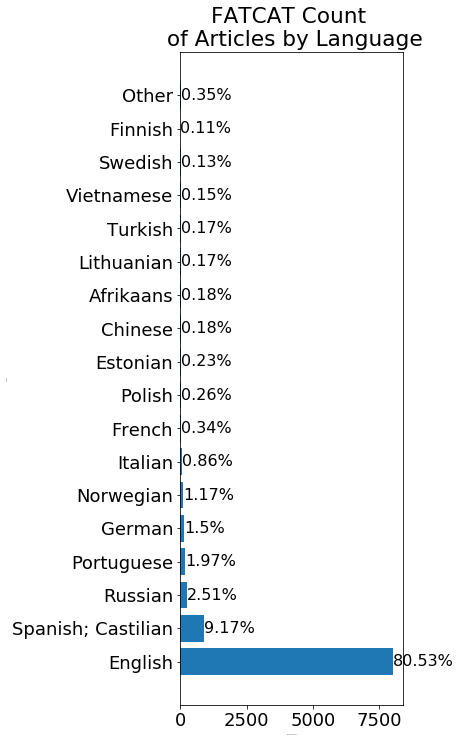

In [112]:
plt.figure(figsize=(4, 12))

myplot = plt.barh(df_lang_counts_withOther_fatcat['Language'], df_lang_counts_withOther_fatcat['counts'])
plt.ylabel('Language')
plt.xlabel('Number of Articles')
plt.title('FATCAT Count \n of Articles by Language')
for rect in myplot.patches:
    xcoor = rect.get_y() + .5*rect.get_height()
    ycoor = rect.get_width()
    pcent = round(100*ycoor / sum(df_lang_counts_withOther_fatcat['counts']), 2)
    plt.text(ycoor, xcoor, str(pcent) + '%', 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=16, color='black')

# __Feature Engineering__

## Wordcount

In [130]:
def addWordCount(row):
    return countWords(row.Text)

In [131]:
def countWords(x): 
    """ This function takes the input text and counts the number of question mark characters in it
    """
    x = str(x)
    count = len(x.split(' '))
    return count

In [132]:
%%time
df_featuresFinal['word_count'] = apply_by_multiprocessing(df_featuresFinal, addWordCount, axis=1, workers=nodes)

CPU times: user 349 ms, sys: 2.03 s, total: 2.38 s
Wall time: 3.18 s


# Punctuation 

In [133]:
def addQuestionColumn(row):
    return countQuestionMark(row.Text, row.word_count)

In [134]:
def countQuestionMark(x, word_count): 
    """ This function takes the input text and counts the number of question mark characters in it

    """
    x = str(x)
    count = x.count('?')/word_count
    return count

In [135]:
%%time
df_featuresFinal['question_mark'] = apply_by_multiprocessing(df_featuresFinal, addQuestionColumn, axis=1, workers=nodes)

CPU times: user 281 ms, sys: 1.57 s, total: 1.85 s
Wall time: 2.51 s


In [136]:
def addExclamationPoint(row):
    return countExclamationPoint(row.Text, row.word_count)

In [137]:
def countExclamationPoint(x, word_count): 
    """ This function takes the input text and counts the number of question mark characters in it
    """
    x = str(x)
    count = x.count('!')/word_count
    return count

In [138]:
%%time
df_featuresFinal['exclamation_point'] = apply_by_multiprocessing(df_featuresFinal, addExclamationPoint, axis=1, workers=nodes)

CPU times: user 314 ms, sys: 1.55 s, total: 1.87 s
Wall time: 2.49 s


In [139]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000


# Keywords

In [140]:
# import mtranslate
from mtranslate import translate

translate("Bonjour","en","auto")

'Hello'

In [141]:
# !pip install mtranslate
#!pip install google_trans_new

In [142]:
import google_trans_new

In [143]:
google_trans_new.LANGUAGES.keys()

dict_keys(['af', 'sq', 'am', 'ar', 'hy', 'az', 'eu', 'be', 'bn', 'bs', 'bg', 'ca', 'ceb', 'ny', 'zh-cn', 'zh-tw', 'co', 'hr', 'cs', 'da', 'nl', 'en', 'eo', 'et', 'tl', 'fi', 'fr', 'fy', 'gl', 'ka', 'de', 'el', 'gu', 'ht', 'ha', 'haw', 'iw', 'he', 'hi', 'hmn', 'hu', 'is', 'ig', 'id', 'ga', 'it', 'ja', 'jw', 'kn', 'kk', 'km', 'ko', 'ku', 'ky', 'lo', 'la', 'lv', 'lt', 'lb', 'mk', 'mg', 'ms', 'ml', 'mt', 'mi', 'mr', 'mn', 'my', 'ne', 'no', 'or', 'ps', 'fa', 'pl', 'pt', 'pa', 'ro', 'ru', 'sm', 'gd', 'sr', 'st', 'sn', 'sd', 'si', 'sk', 'sl', 'so', 'es', 'su', 'sw', 'sv', 'tg', 'ta', 'te', 'th', 'tr', 'tk', 'uk', 'ur', 'ug', 'uz', 'vi', 'cy', 'xh', 'yi', 'yo', 'zu'])

In [144]:
languages = ['af', 'sq', 'am', 'ar', 'hy', 'az', 'eu', 'be', 'bn', 'bs', 'bg', 'ca', 'ceb', 'ny', 'zh-cn', 'zh-tw', 'co', 'hr', 'cs', 'da', 'nl', 'en', 'eo', 'et', 'tl', 'fi', 'fr', 'fy', 'gl', 'ka', 'de', 'el', 'gu', 'ht', 'ha', 'haw', 'iw', 'he', 'hi', 'hmn', 'hu', 'is', 'ig', 'id', 'ga', 'it', 'ja', 'jw', 'kn', 'kk', 'km', 'ko', 'ku', 'ky', 'lo', 'la', 'lv', 'lt', 'lb', 'mk', 'mg', 'ms', 'ml', 'mt', 'mi', 'mr', 'mn', 'my', 'ne', 'no', 'or', 'ps', 'fa', 'pl', 'pt', 'pa', 'ro', 'ru', 'sm', 'gd', 'sr', 'st', 'sn', 'sd', 'si', 'sk', 'sl', 'so', 'es', 'su', 'sw', 'sv', 'tg', 'ta', 'te', 'th', 'tr', 'tk', 'uk', 'ur', 'ug', 'uz', 'vi', 'cy', 'xh', 'yi', 'yo', 'zu']

In [145]:
translate("abstract",languages[1],"auto")

'abstrakte'

In [146]:
def translateWord(word_list):
    languages = ['af', 'sq', 'am', 'ar', 'hy', 'az', 'eu', 'be', 'bn', 'bs', 'bg', 'ca', 'ceb', 'ny', 'zh-cn', 'zh-tw', 'co', 'hr', 'cs', 'da', 'nl', 'en', 'eo', 'et', 'tl', 'fi', 'fr', 'fy', 'gl', 'ka', 'de', 'el', 'gu', 'ht', 'ha', 'haw', 'iw', 'he', 'hi', 'hmn', 'hu', 'is', 'ig', 'id', 'ga', 'it', 'ja', 'jw', 'kn', 'kk', 'km', 'ko', 'ku', 'ky', 'lo', 'la', 'lv', 'lt', 'lb', 'mk', 'mg', 'ms', 'ml', 'mt', 'mi', 'mr', 'mn', 'my', 'ne', 'no', 'or', 'ps', 'fa', 'pl', 'pt', 'pa', 'ro', 'ru', 'sm', 'gd', 'sr', 'st', 'sn', 'sd', 'si', 'sk', 'sl', 'so', 'es', 'su', 'sw', 'sv', 'tg', 'ta', 'te', 'th', 'tr', 'tk', 'uk', 'ur', 'ug', 'uz', 'vi', 'cy', 'xh', 'yi', 'yo', 'zu']    
    Translations = pd.DataFrame({"Language": languages})
    for word in word_list:
        translation = []
        for lang in languages:
            translation.append(translate(word,lang,"auto").lower())
        Translations[word] = translation
    return Translations

## Keyword - structural

In [147]:
%%time
structure_translations = translateWord(["abstract", "methods", "references", "results", "discussion", "conclusion", "introduction", "literature", "review", "figure", "table"])

CPU times: user 10 s, sys: 655 ms, total: 10.7 s
Wall time: 3min 5s


In [148]:
structure_translations

,Language,abstract,methods,references,results,discussion,conclusion,introduction,literature,review,figure,table
0,af,abstrak,metodes,verwysings,resultate,bespreking,afsluiting,inleiding,literatuur,resensie,figuur,tafel
1,sq,abstrakte,metodat,referencat,rezultatet,diskutim,përfundim,prezantimi,letërsi,rishikim,figurë,tryezë
2,am,ረቂቅ,ዘዴዎች,ማጣቀሻዎች,ውጤቶች,ውይይት,መደምደሚያ,መግቢያ,ሥነ ጽሑፍ,ግምገማ,ምስል,ጠረጴዛ
3,ar,نبذة مختصرة,أساليب,المراجع,النتائج,نقاش,استنتاج,المقدمة,الأدب,إعادة النظر,الشكل,الطاولة
4,hy,վերացական,մեթոդները,հղումներ,արդյունքներ,քննարկում,եզրակացություն,ներածություն,գրականություն,վերանայում,գործիչ,սեղան
...,...,...,...,...,...,...,...,...,...,...,...,...
103,cy,haniaethol,dulliau,cyfeiriadau,canlyniadau,trafodaeth,casgliad,cyflwyniad,llenyddiaeth,adolygiad,ffigur,bwrdd
104,xh,abstract,iindlela,izingqinisiso,iziphumo,ingxoxo,isiphelo,intshayelelo,uncwadi,uphononongo,umzobo,itafile
105,yi,אַבסטראַקט,מעטהאָדס,באַווייַזן,רעזולטאַטן,דיסקוסיע,מסקנא,הקדמה,ליטעראַטור,רעצענזיע,פיגורע,טיש
106,yo,áljẹbrà,awọn ọna,awọn itọkasi,awọn esi,ijiroro,ipari,ifihan,litireso,atunwo,olusin,tabili


In [149]:
# langList = structure_translations[structure_translations["Language"] == "es"].to_numpy()[0]
# langList = langList[1:len(langList)]
# langList

In [150]:
x = "This sentence contains the word abstract so that we can test its functionality"
y = x.lower()
langList = structure_translations[structure_translations["Language"] == "en"].to_numpy()[0]
langList = langList[1:len(langList)]
count = 0
for word in langList:
    count = count + y.count(word)
count

1

In [151]:
def addStructureKeyword(row):
    return findKeyWord(row.Text, row.lang_langdetect_multi, structure_translations)

In [152]:
def findKeyWord(x, language, word_type_DF): 
    """ This function takes the input text and sees if it contains a keyword
    """
    y = x.lower()
    langList = word_type_DF[word_type_DF["Language"] == language].to_numpy()[0]
    langList = langList[1:len(langList)]
    count = 0
    for word in langList:
        count = count + y.count(word)
    return count

Test of the findkeyword function

In [153]:
findKeyWord("This sentence contains the word abstract so that we can test its functionality", "en", structure_translations)
# findKeyWord("This sentence contains the word abstract so that we can test its functionality")

1

In [154]:
findKeyWord("This sentence contains the word abstract so that we can test its functionality", "es", structure_translations)

0

In [159]:
addExclamationPoint(df_featuresFinal.iloc[2,:])

0.0029542097488921715

Applying these functions to the who dataframe

In [160]:
%%time
df_featuresFinal['structure_count'] = apply_by_multiprocessing(df_featuresFinal, addStructureKeyword, axis=1, workers=nodes)

CPU times: user 356 ms, sys: 1.81 s, total: 2.17 s
Wall time: 3.22 s


In [161]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,9
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808,0
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000,59
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000,84
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000,1
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000,92


## Keywords - Format

In [162]:
%%time
format_translations = translateWord(["paper", "journal", "publication", "this paper", "article", "publisher", "doi", "pubmed", "scholar", "retracted"]) #identifying documents in scope of a collection from web archive

CPU times: user 9.17 s, sys: 606 ms, total: 9.77 s
Wall time: 3min 27s


In [163]:
format_translations

,Language,paper,journal,publication,this paper,article,publisher,doi,pubmed,scholar,retracted
0,af,papier,joernaal,publikasie,hierdie vraestel,artikel,uitgewer,doi,gepubliseer,geleerde,ingetrek
1,sq,letër,ditar,botimi,këtë letër,artikulli,botues,doi,pubmed,dijetar,tërhiqet
2,am,ወረቀት,መጽሔት,ህትመት,ይህ ወረቀት,መጣጥፍ,አሳታሚ,ዶይ,ያረጁ,ምሁር,ተመለሰ
3,ar,ورق,مجلة,النشر,هذه الورقة,مقالة - سلعة,الناشر,دوى,تم النشر,مختص بمجال علمي,تراجع
4,hy,թուղթ,օրագիր,հրապարակումը,այս թուղթը,հոդված,հրատարակիչ,դոի,փաբով,գիտնական,հետ է կանչվել
...,...,...,...,...,...,...,...,...,...,...,...
103,cy,papur,cyfnodolyn,cyhoeddi,y papur hwn,erthygl,cyhoeddwr,doi,tafarn,ysgolhaig,wedi'i dynnu'n ôl
104,xh,iphepha,ijenali,upapasho,eli phepha,inqaku,umshicileli,doi,ishicilelwe,umfundi,irhoxisiwe
105,yi,פּאַפּיר,זשורנאַל,ויסגאַבע,דעם פּאַפּיר,אַרטיקל,אַרויסגעבער,דוי,פּובמעד,געלערנטער,צוריקציען זיך
106,yo,iwe,iwe iroyin,atejade,iwe yii,nkan,akede,ṣe,pobu,omowe,retracted


In [164]:
def addFormatKeyword(row):
    return findKeyWord(row.Text, row.lang_langdetect_multi, format_translations)

In [165]:
df_featuresFinal['format_count'] = apply_by_multiprocessing(df_featuresFinal, addFormatKeyword, axis=1, workers=nodes)

In [166]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,9,1
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808,0,0
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000,59,39
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000,84,220
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000,1,15
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000,92,178


## Keywords - Contextual

In [167]:
%%time
context_translations = translateWord(["hypothesis", "research", "experiment", "theory", "trial", "result", "study", "control", "data", "metadata"])

CPU times: user 9.17 s, sys: 602 ms, total: 9.78 s
Wall time: 2min 46s


In [168]:
context_translations

,Language,hypothesis,research,experiment,theory,trial,result,study,control,data,metadata
0,af,hipotese,navorsing,eksperimenteer,teorie,verhoor,resultaat,studeer,beheer,data,metadata
1,sq,hipoteza,hulumtim,eksperimentojnë,teoria,gjykimi,rezultat,studimi,kontrolli,të dhëna,metadata
2,am,መላምት,ምርምር,ሙከራ,ቲዎሪ,ሙከራ,ውጤት,ጥናት,ቁጥጥር,መረጃ,ሜታዳታ
3,ar,فرضية,ابحاث,تجربة,نظرية,التجربة,نتيجة,دراسة,مراقبة,بيانات,البيانات الوصفية
4,hy,վարկած,հետազոտություն,փորձարկում,տեսություն,դատավարություն,արդյունք,ուսումնասիրել,հսկողություն,տվյալներ,մետատվյալներ
...,...,...,...,...,...,...,...,...,...,...,...
103,cy,rhagdybiaeth,ymchwil,arbrofi,theori,treial,canlyniad,astudio,rheolaeth,data,metadata
104,xh,intelekelelo,uphando,ulingo,ithiyori,ityala,iziphumo,ukufunda,ulawulo,idatha,iimethadatha
105,yi,כייפּאַטאַסאַס,פאָרשונג,עקספּערימענט,טעאריע,פּראָצעס,רעזולטאַט,לערנען,קאָנטראָל,דאַטן,metadata
106,yo,idawọle,iwadi,adanwo,yii,iwadii,abajade,iwadi,iṣakoso,data,metadata


In [169]:
def addContextKeyword(row):
    return findKeyWord(row.Text, row.lang_langdetect_multi, context_translations)

In [170]:
df_featuresFinal['context_count'] = apply_by_multiprocessing(df_featuresFinal, addContextKeyword, axis=1, workers=nodes)

In [171]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0,0
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,9,1,2
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808,0,0,0
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000,59,39,95
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000,84,220,102
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000,1,15,2
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000,92,178,78


# Keywords - Second Person Pronouns (considered a formality feature)

In [172]:
%%time
second_person_pronoun_translations = translateWord(["you", "yours", "yourself", "yourselves"])

CPU times: user 3.65 s, sys: 261 ms, total: 3.91 s
Wall time: 1min 2s


In [173]:
second_person_pronoun_translations

,Language,you,yours,yourself,yourselves
0,af,jy,joune,jouself,julle self
1,sq,ti,tuajat,vetveten,veten tuaj
2,am,አንቺ,ያንተ,ራስህን,እራሳችሁ
3,ar,أنت,لك,نفسك,أنفسكم
4,hy,դու,քոնը,ինքներդ ձեզ,ինքներդ ձեզ
...,...,...,...,...,...
103,cy,ti,eich un chi,eich hun,eich hunain
104,xh,wena,eyakho,ngokwakho,nina ngokwenu
105,yi,דו,דייַן,זיך,זיך
106,yo,ìwọ,tirẹ,funrararẹ,ẹ̀yin fúnra yín


In [174]:
def addPronounKeyword(row):
    return findKeyWord(row.Text, row.lang_langdetect_multi, second_person_pronoun_translations)

In [175]:
df_featuresFinal['pronoun_count'] = apply_by_multiprocessing(df_featuresFinal, addPronounKeyword, axis=1, workers=nodes)

In [176]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0,0,0
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0,2
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,9,1,2,13
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808,0,0,0,18
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000,3,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000,59,39,95,3
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000,84,220,102,8
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000,1,15,2,1
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000,92,178,78,5


# URLs

In [177]:
# !pip install tldextract

In [178]:
import tldextract

In [179]:
def hasEducationSuffix(row):
    ext = tldextract.extract(row.url)
#     print(ext)
    # check for .edu and .ac.xx domains
    return ext.suffix == 'edu' or 'ac.' in ext.suffix

In [180]:
df_featuresFinal['has_edu_suffix'] = apply_by_multiprocessing(df_featuresFinal, hasEducationSuffix, axis=1, workers=nodes)

In [182]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0,0,0,False
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0,2,False
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,9,1,2,13,False
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808,0,0,0,18,False
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000,3,0,4,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000,59,39,95,3,False
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000,84,220,102,8,False
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000,1,15,2,1,True
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000,92,178,78,5,False


In [183]:
# df_featuresFinal.to_csv("data_withfeatures_Apr7.csv")

# Formality

In [ ]:
df_featuresFinal = pd.read_csv("GWBFATCAT_with_initial_features_Mar31.csv")

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from collections import Counter
from collections import defaultdict

#merge POS here
#import library to get the meaning of pos tags
from nltk.data import load
tagdict = load('help/tagsets/upenn_tagset.pickle')

#get POS abbreviations
def get_pos_abbrev(pos_type):
    posofinterest = []
    for pos,info in tagdict.items():
        if pos_type in info[0]:
            posofinterest.append(pos)
    return posofinterest

# get abbreviations for POS and segregate by formality
#informal
interjections = get_pos_abbrev("interjection")
verbs = get_pos_abbrev("verb")
pronouns = get_pos_abbrev("pronoun")

informal = interjections + verbs + pronouns

#informal
nouns = get_pos_abbrev("noun")
nouns = [noun for noun in nouns if noun not in pronouns]
adjectives = get_pos_abbrev("adjective")
prepositions = get_pos_abbrev("preposition")
formal = nouns + adjectives + prepositions

In [ ]:
# find the counts by pos
def pos_count(text):    
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    tags = nltk.pos_tag(words)
    counts = Counter( tag for word,  tag in tags)
    return counts

import operator
def sort_dict(x, reverse = True):
    if reverse == False:
        return {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse = True)}

#get formality score
def formal_informal_count(pos_count_dict, percent = False, include_other = True):
    """
    Returns the number of formal and informal words in a dictionary.\n
    Parameters:\n
    pos_count_dict: a dictionary of words as keys and the parts of speech as value\n
    percent: Bool, default: False  ---- whether to return the values as a percent. True will return the values as count.\n
    include_other: Bool, default: True ---- whether to return the inclusion of other (not formal or informal)\n 
    """
    total = {"informal":0, "formal":0, "other":0}
    for pos, count in pos_count_dict.items():
        if pos in informal:
            total["informal"] += count
        elif pos in formal:
            total["formal"] += count
        else:
            total["other"] += count 
    if include_other == False:
        del total['other']
    if percent == True:
        sums = sum(total.values(), 0.0)
        total = {k: v / sums for k, v in total.items()}
    return total["formal"]


In [ ]:
# create helper function to use multiprocessing
def addFormalityColumn(row):
    return formal_informal_count(pos_count(row.Text), percent = True, include_other = False)

In [ ]:
english_df = df_featuresFinal[df_featuresFinal["lang_langdetect_multi"]=="en"]

In [ ]:
df_nonen = df_featuresFinal[df_featuresFinal["lang_langdetect_multi"]!="en"]

In [ ]:
%%time
english_df['formality'] = apply_by_multiprocessing(english_df, addFormalityColumn, axis=1, workers=nodes)

In [ ]:
english_df.head()

In [ ]:
from langdetect import detect
from mtranslate import translate

def addLang(row):
    try:
        lang_detected = detect(row.Text)
        return lang_detected
    except:
        return np.nan
    

def get_translation(x, lan):
    try:
        translation = translate(x, lan, "auto")
    except:
        translation = ""
    return translation

def addEnglishTranslation(row):
    return get_translation(row.Text, "en")

def addLang_Translated(row):
    try:
        lang_detected = detect(row.en_translate)
        return lang_detected
    except:
        return np.nan

In [ ]:
%%time
df_nonen["en_translate"] = apply_by_multiprocessing(df_nonen,addEnglishTranslation, axis = 1, workers = nodes)

In [ ]:
df_nonen['en_translate'] = df_nonen['en_translate'].astype('string')

In [ ]:
df_nonen_translated = df_nonen[df_nonen["en_translate"]!=""]

In [ ]:
df_nonen_translated.dtypes

In [ ]:
%%time
df_nonen_translated['lang_translation'] = apply_by_multiprocessing(df_nonen_translated, addLang_Translated, axis=1, workers=nodes)

In [ ]:
df_nonen_translated

In [ ]:
# drop columns that 
df_moji = df_nonen_translated[df_nonen_translated["lang_translation"] != "en"]
df_nonmoji = df_nonen_translated[df_nonen_translated["lang_translation"] == "en"]

In [ ]:
df_nonmoji.drop('lang_translation', inplace=True, axis=1)

In [ ]:
# add formality
# create helper function to use multiprocessing
def addFormalityColumn(row):
    return formal_informal_count(pos_count(row.en_translate), percent = True, include_other = False)

In [ ]:
%%time
df_nonmoji['formality'] = apply_by_multiprocessing(df_nonmoji, addFormalityColumn, axis=1, workers=nodes)

In [ ]:
df_nonmoji.to_csv("final_nonenglish.csv")
english_df.to_csv("final_english.csv")

In [ ]:
# mean for english formal and non-formal
english_df.groupby('research').mean()

In [ ]:
english_df["formality"].hist(bins=10)

In [ ]:
english_df.boxplot(column = ['formality'], by='research')

In [11]:
final_english = pd.read_csv("final_english.csv")
final_nonenglish = pd.read_csv("final_nonenglish.csv")
df_featuresFinal2 = pd.read_csv("data_withfeatures_Apr7.csv")

In [12]:
final_english.head(2)

,Unnamed: 0,Unnamed: 0.1,index,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,formality
0,1,1,1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0,2,False,0.802178
1,2,2,2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,7,1,2,13,False,0.642857


In [13]:
final_nonenglish.head(2)

,Unnamed: 0,Unnamed: 0.1,index,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,en_translate,formality
0,12,12,12,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,KMHUW5DKFGSESHAFSEO4SLGUWPUWV2A7,http://bfnw.ek21.com/tail/about.shtml,尋夢園網路聊天室 18~25歲聊天室 21~25歲聊天室 24~32歲聊天室 26~30歲聊...,ko,279,0.003584,0.010753,0,0,0,0,False,Dream Garden Internet chat room 18-25 years ol...,0.930502
1,14,14,14,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,TDUYMOCD37SG2UNV646XYSLKBI54JKV2,http://www.tukkk.com/2bulgarian/bulgarian-1-9.htm,保加利亚语学习 保加利亚语学习网 保加利亚语学习网站 保加利亚语学习视频 保加利亚语在线学习...,bg,210,0.000000,0.000000,0,0,0,5,False,Bulgarian language learning Bulgarian language...,0.848875


In [14]:
df_featuresFinal2.head(2)

,Unnamed: 0,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix
0,0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0,0,0,False
1,1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0,2,False


In [15]:
final_nonenglish = final_nonenglish[["filename", "formality"]]
final_english = final_english[["filename", "formality"]]


In [18]:
df_formality = pd.concat((final_english, final_nonenglish))

In [19]:
df_formality

,filename,formality
0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,0.802178
1,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,0.642857
2,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,0.821918
3,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,0.682879
4,UYCPJVQ4CL4DJCGLXLNQGESRBCTDN5LY,0.866064
...,...,...
2841,0f1cdfcb289630ffc657fff15b80acbf677b2597,0.784024
2842,8c5ddf8179d151cb3a9031da5014735a683bcda0,0.907895
2843,9a580d1b5649a053a507c96d62c9c0c9651776ff,0.928753
2844,0f29b8a249f82d0eba14cc4ea9d9fc8000ce7c7c,0.887701


In [25]:
df_featuresFinal2 = df_featuresFinal2.merge(df_formality, how = "left", left_on = "filename", right_on = "filename")

In [26]:
df_featuresFinal2["has_edu_suffix"] = df_featuresFinal2["has_edu_suffix"].astype(int)

In [27]:
df_featuresFinal2.head(2)

,Unnamed: 0,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,formality
0,0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0,0,0,0,NaN
1,1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0,2,0,0.802178


In [42]:
df_html = pd.read_csv("GWBFATCAT_with_initial_features_Mar28.csv")

In [43]:
df_html.columns

Index(['Unnamed: 0', 'index', 'html_file', 'source', 'research', 'filename',
       'url', 'Text', 'lang_langdetect_multi', 'word_count', 'question_mark',
       'exclamation_point', 'structure_count', 'format_count', 'context_count',
       'has_edu_suffix', 'has_meta_title', 'has_meta_abstract', 'has_meta_doi',
       'has_meta_number', 'has_meta_container_issn', 'has_meta_isbn',
       'has_meta_publisher'],
      dtype='object')

In [44]:
df_html = df_html[["filename", 'has_meta_title', 'has_meta_abstract', 'has_meta_doi',
       'has_meta_number', 'has_meta_container_issn', 'has_meta_isbn',
       'has_meta_publisher']]
df_html.head(2)

,filename,has_meta_title,has_meta_abstract,has_meta_doi,has_meta_number,has_meta_container_issn,has_meta_isbn,has_meta_publisher
0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,1,1,0,0,0,0,0
1,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,1,0,0,0,0,0,0


In [47]:
len(df_html[df_html["has_meta_title"]==1])

7828

In [48]:
len(df_html[df_html["has_meta_title"]==1])

7828

In [49]:
len(df_html[df_html["has_meta_abstract"]==1])

7355

In [50]:
len(df_html[df_html["has_meta_doi"]==1])

0

In [51]:
len(df_html[df_html["has_meta_number"]==1])

0

In [52]:
len(df_html[df_html["has_meta_container_issn"]==1])

0

In [53]:
len(df_html[df_html["has_meta_isbn"]==1])

0

In [54]:
len(df_html[df_html["has_meta_publisher"]==1])

2

In [55]:
df_html = df_html[["filename", 'has_meta_title', 'has_meta_abstract']]

In [ ]:
df_html

In [56]:
df_featuresFinal2 = df_featuresFinal2.merge(df_html, how = "left", left_on = "filename", right_on = "filename")

In [58]:
df_featuresFinal2.to_csv("FinalFeatures_Apr10.csv")

# HTML Tags

In [31]:
# Selectors for types of meta tag information
metatag_selectors = {
    "title": [
        "citation_title",
        "eprints.title",
        "prism.title",
        "bepress_citation_title",
        "og:title",
        "dcterms.title",
        "dc.title",
    ],
    "abstract": [
        "citation_abstract",
        "bepress_citation_abstract",
        "eprints.abstract",
        "dcterms.abstract",
        "prism.teaser",
        "dc.description",
        "og:description",
    ],
    "doi": [
        "citation_doi",
        "DOI",
        "prism.doi",
        "bepress_citation_doi",
        "dc.identifier.doi",
    ],
    "number": [
        "citation_technical_report_number",
        "bepress_citation_technical_report_number",
        "citation_number",
        "bepress_citation_number",
        "prism.number",
    ],
    "container_issn": [
        "citation_issn",
        "bepress_citation_issn",
        "prism.issn",
        "prism.eIssn",
        "eprints.issn",
        "dc.source.issn",
    ],
    "isbn": [
        "citation_isbn",
        "bepress_citation_isbn",
        "prism.isbn",
    ],
    "publisher": [
        "citation_publisher",
        "bepress_citation_publisher",
        "eprints.publisher']",
        "citation_technical_report_institution",
        "dcterms.publisher",
        "dc.publisher",
    ]
}

In [32]:
def hasMetaTag(row, group):
    soup = BeautifulSoup(open(row['html_file'], encoding = "ISO-8859-1"), "html.parser")
    
    response = False
    for metatag in metatag_selectors[group]:
        value_found = soup.find("meta",  property=metatag)
        if value_found:
#             print(value_found)
            response = True
    
    return response
            

In [39]:
nodes = cpu_count()

In [1]:
%%time
df_featuresFinal2['has_meta_title'] = apply_by_multiprocessing(df_featuresFinal2, hasMetaTag, axis=1, workers=nodes, group='title')


In [2]:
df_featuresFinal['has_meta_abstract'] = apply_by_multiprocessing(df_featuresFinal, hasMetaTag, axis=1, workers=nodes, group='abstract')
df_featuresFinal['has_meta_doi'] = apply_by_multiprocessing(df_featuresFinal, hasMetaTag, axis=1, workers=nodes, group='doi')
df_featuresFinal['has_meta_number'] = apply_by_multiprocessing(df_featuresFinal, hasMetaTag, axis=1, workers=nodes, group='number')
df_featuresFinal['has_meta_container_issn'] = apply_by_multiprocessing(df_featuresFinal, hasMetaTag, axis=1, workers=nodes, group='container_issn')
df_featuresFinal['has_meta_isbn'] = apply_by_multiprocessing(df_featuresFinal, hasMetaTag, axis=1, workers=nodes, group='isbn')
df_featuresFinal['has_meta_publisher'] = apply_by_multiprocessing(df_featuresFinal, hasMetaTag, axis=1, workers=nodes, group='publisher')

In [186]:
df_featuresFinal

,html_file,source,research,filename,url,Text,lang_langdetect_multi,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix
0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,618,0.000000,0.004854,0,0,0,0,False
1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,637,0.012559,0.001570,0,1,0,2,False
2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,677,0.017725,0.002954,9,1,2,13,False
3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,433,0.011547,0.050808,0,0,0,18,False
4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,546,0.000000,0.000000,3,0,4,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,4868,0.000205,0.000000,59,39,95,3,False
9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,11302,0.000265,0.000000,84,220,102,8,False
9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,1977,0.000000,0.000000,1,15,2,1,True
9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,9139,0.000219,0.000000,92,178,78,5,False


In [3]:
df_featuresFinal['has_meta_title'] = df_featuresFinal['has_meta_title'].astype(int)
df_featuresFinal['has_meta_abstract'] = df_featuresFinal['has_meta_abstract'].astype(int)
df_featuresFinal['has_meta_doi'] = df_featuresFinal['has_meta_doi'].astype(int)
df_featuresFinal['has_meta_number'] = df_featuresFinal['has_meta_number'].astype(int)
df_featuresFinal['has_meta_container_issn'] = df_featuresFinal['has_meta_container_issn'].astype(int)
df_featuresFinal['has_meta_isbn'] = df_featuresFinal['has_meta_isbn'].astype(int)
df_featuresFinal['has_meta_publisher'] = df_featuresFinal['has_meta_publisher'].astype(int)

# Save to a csv

In [ ]:
# df_featuresFinal.to_csv("data_withfeatures_andhtml_Apr7.csv")